In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import pylab
from matplotlib import cm

In [30]:
#reading in Ca internal standard data
none_ca = pd.read_csv('2022_June_29_25micron_TEST_Ca_noLOD.csv')
howl_ca = pd.read_csv('2022_June_29_25micron_TEST_Ca_Howell_LOD.csv')
long_ca = pd.read_csv('2022_June_29_25micron_TEST_Ca_Long_LOD.csv')
pett_ca = pd.read_csv('2022_June_29_25micron_TEST_Ca_Pettke_LOD.csv')

In [32]:
# Create a list of DataFrame names
data_ca = ['none_ca', 'howl_ca', 'long_ca', 'pett_ca']

# Iterate over each DataFrame in the data_2019 list
for dataframe_name in data_ca:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [33]:
#reading in Mg internal standard data
none_mg = pd.read_csv('2022_June_29_25micron_TEST_Mg_noLOD.csv')
howl_mg = pd.read_csv('2022_June_29_25micron_TEST_Mg_Howell_LOD.csv')
long_mg = pd.read_csv('2022_June_29_25micron_TEST_Mg_Long_LOD.csv')
pett_mg = pd.read_csv('2022_June_29_25micron_TEST_Mg_Pettke_LOD.csv')

In [34]:
# Create a list of DataFrame names
data_mg = ['none_mg', 'howl_mg', 'long_mg', 'pett_mg']

# Iterate over each DataFrame in the data_2019 list
for dataframe_name in data_mg:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [62]:
# Read the CSV file containing chondrite abundances
chondrite_abundances = pd.read_csv('Abunds_allnew_13jun2023.csv')

# Set the 'Element' column as the index of chondrite_abundances DataFrame
chondrite_abundances = chondrite_abundances.set_index('Element')

# Access the CI (Carbonaceous Chondrite) column from chondrite_abundances DataFrame
CI = chondrite_abundances.CI

hfseCI = [CI.Nb, CI.Ta, CI.Hf, CI.Zr]

In [35]:
phases = none_mg.phase.unique()
intstd = ['ca', 'mg', 'mg', 'ca', 'mg', 'ca', 'ca', 'mg']

In [45]:
howl = pd.DataFrame()
long = pd.DataFrame()
pett = pd.DataFrame()
none = pd.DataFrame()

for i in range(0, len(phases)):
    dataH = 'howl_' + intstd[i]
    dataL = 'long_' + intstd[i]
    dataP = 'pett_' + intstd[i]
    dataN = 'none_' + intstd[i]
    
    howl = pd.concat([howl, globals()[dataH][globals()[dataH].phase==phases[i]]])
    long = pd.concat([long, globals()[dataL][globals()[dataL].phase==phases[i]]])
    pett = pd.concat([pett, globals()[dataP][globals()[dataP].phase==phases[i]]])
    none = pd.concat([none, globals()[dataN][globals()[dataN].phase==phases[i]]])

In [46]:
# Split the 'samples' column by underscores and expand it into new columns
howl[['meteorite', 'clast', 'spot']] = howl['samples'].str.split('_', expand=True)
long[['meteorite', 'clast', 'spot']] = long['samples'].str.split('_', expand=True)
pett[['meteorite', 'clast', 'spot']] = pett['samples'].str.split('_', expand=True)
none[['meteorite', 'clast', 'spot']] = none['samples'].str.split('_', expand=True)

In [60]:
indexes = none.groupby(['meteorite','clast']).count().index

/tmp/ipykernel_1257/4219026254.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 4, figsize=(20,3))


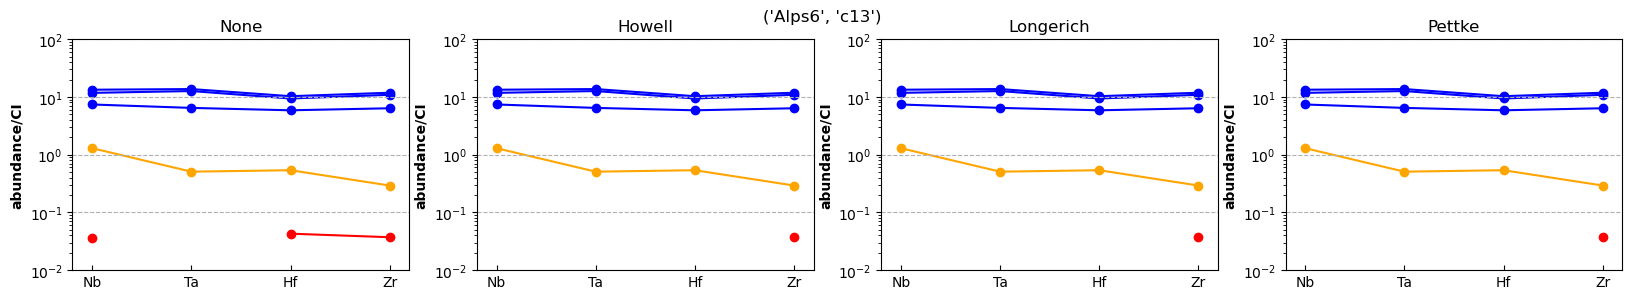

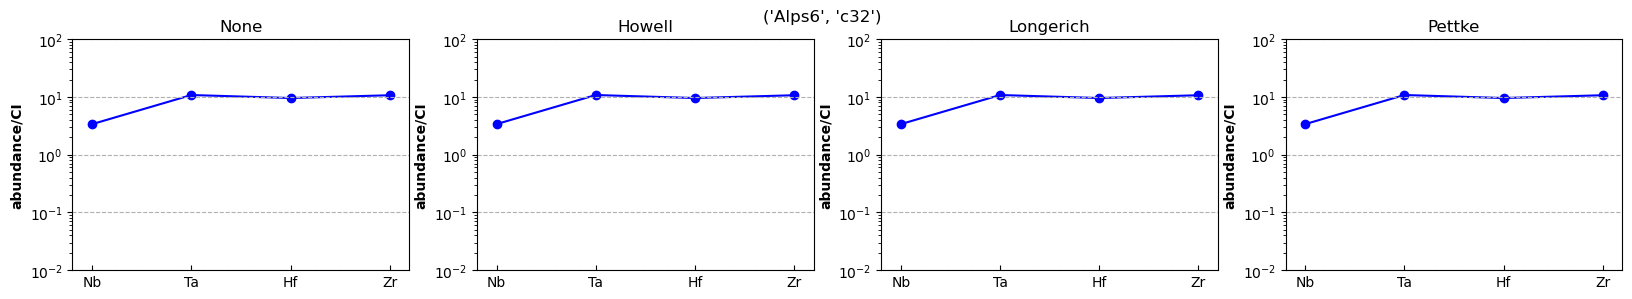

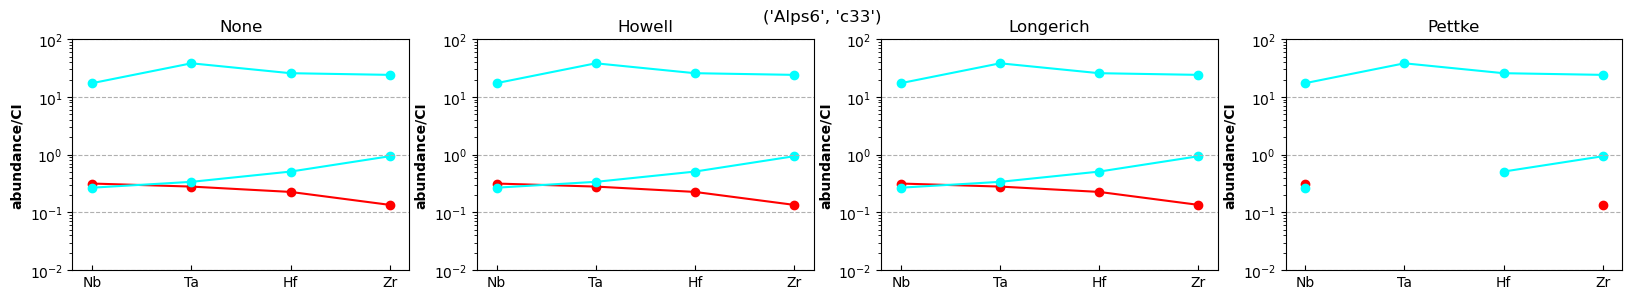

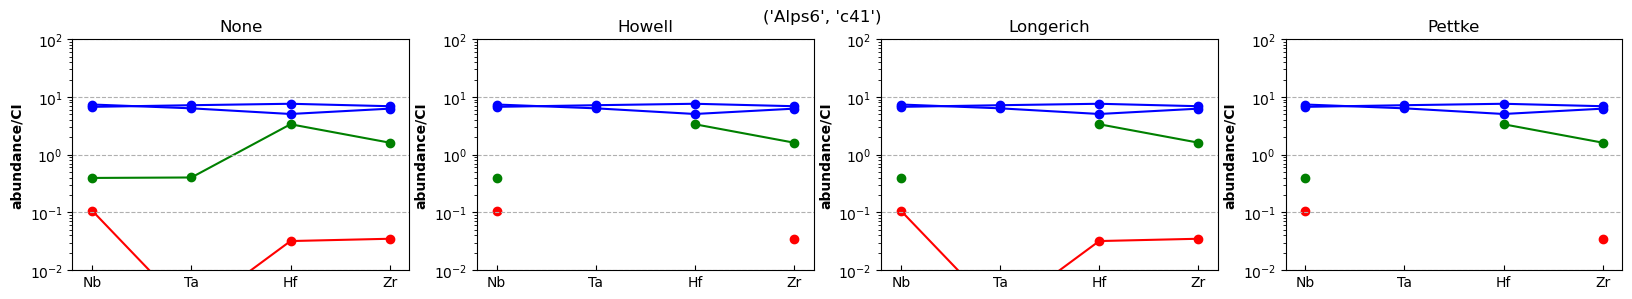

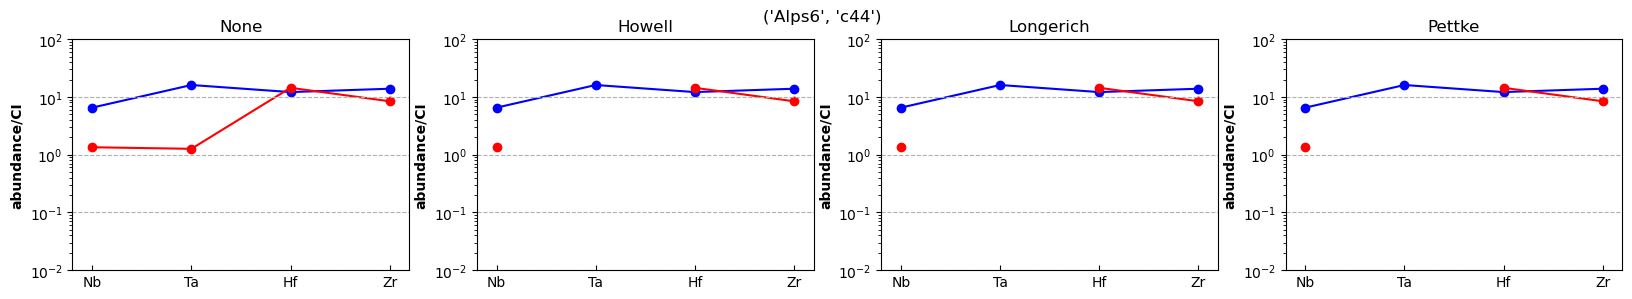

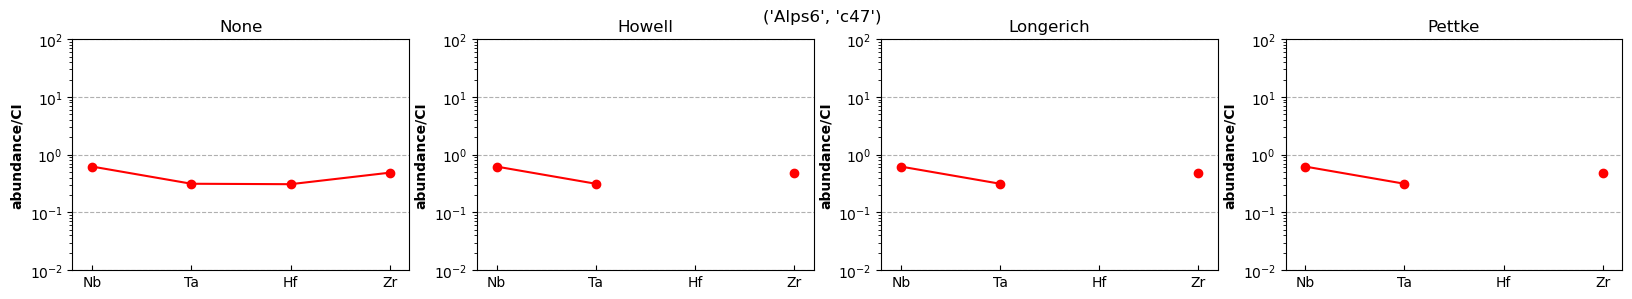

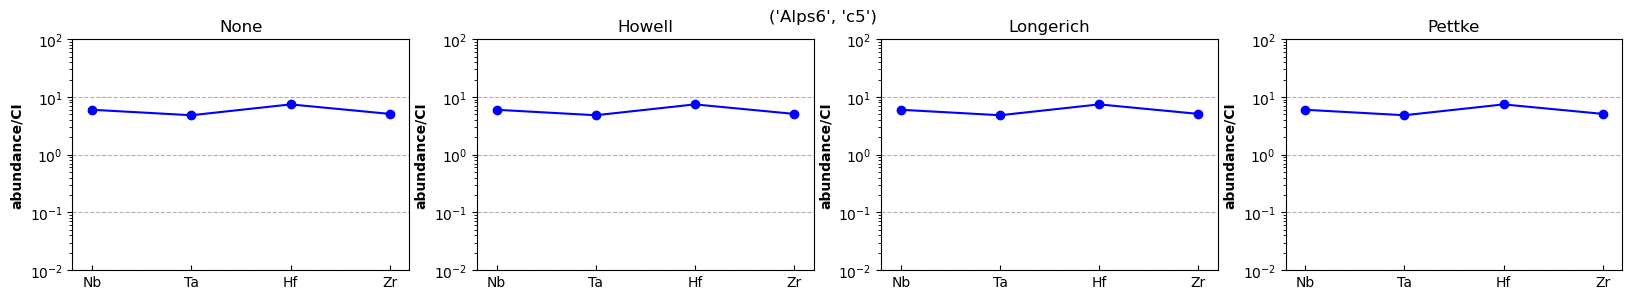

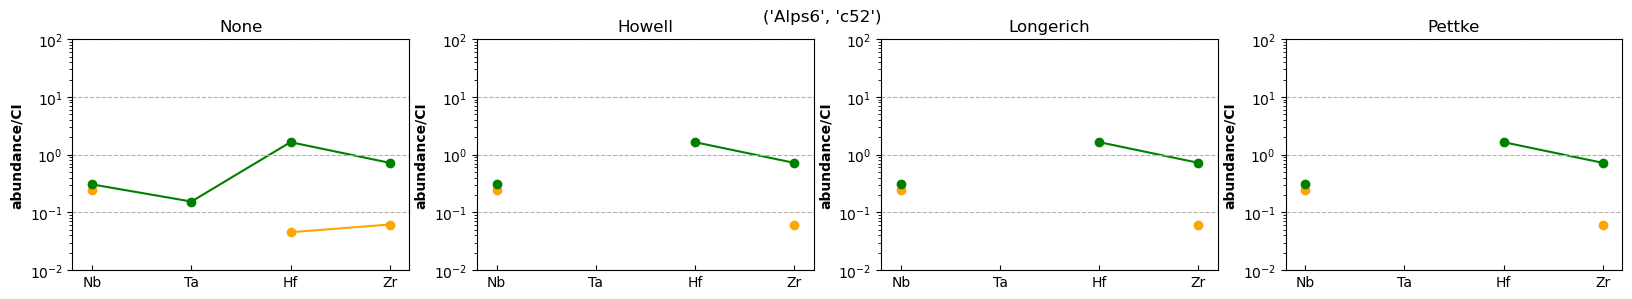

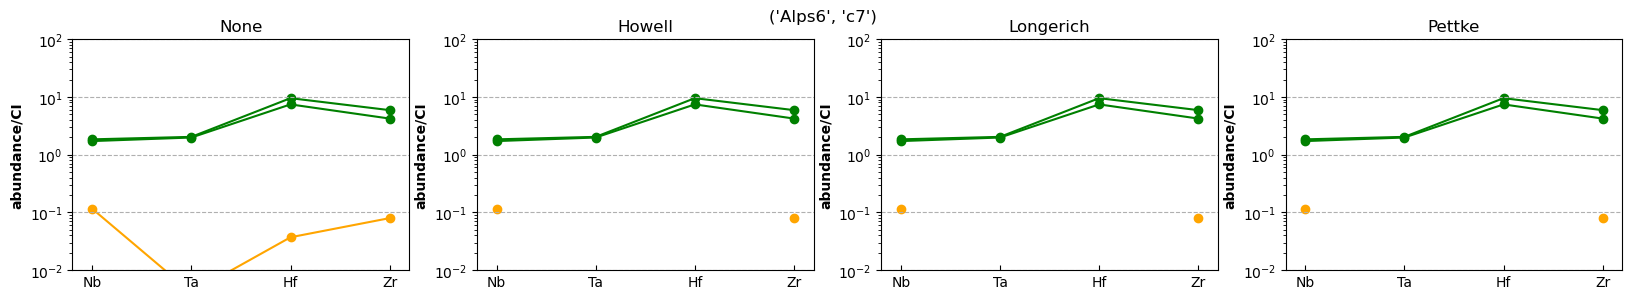

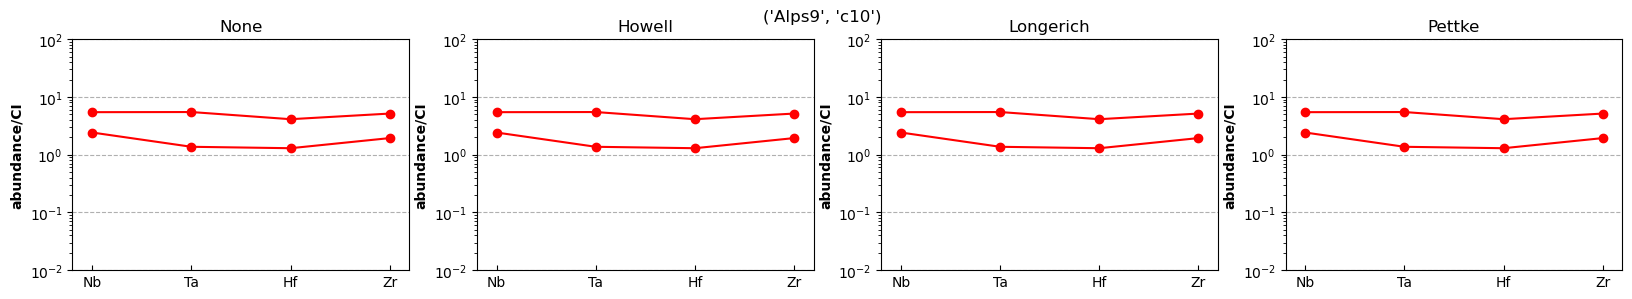

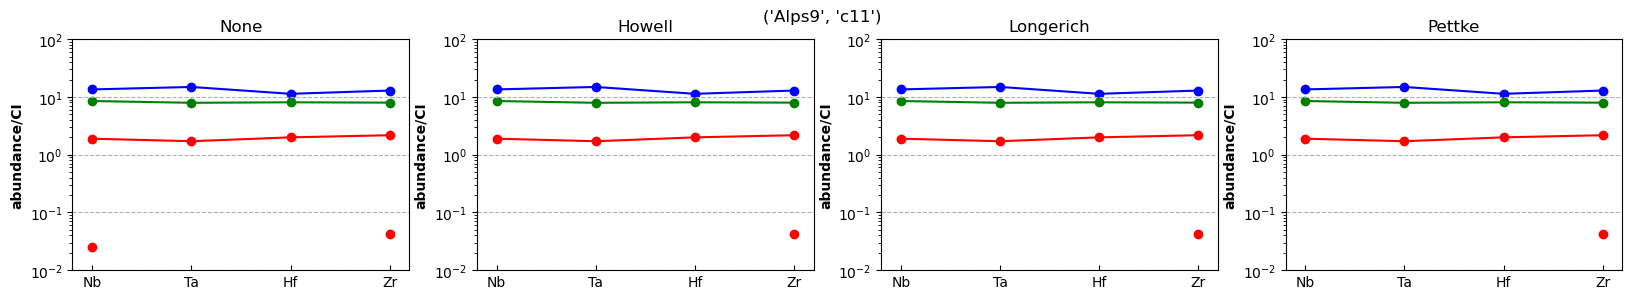

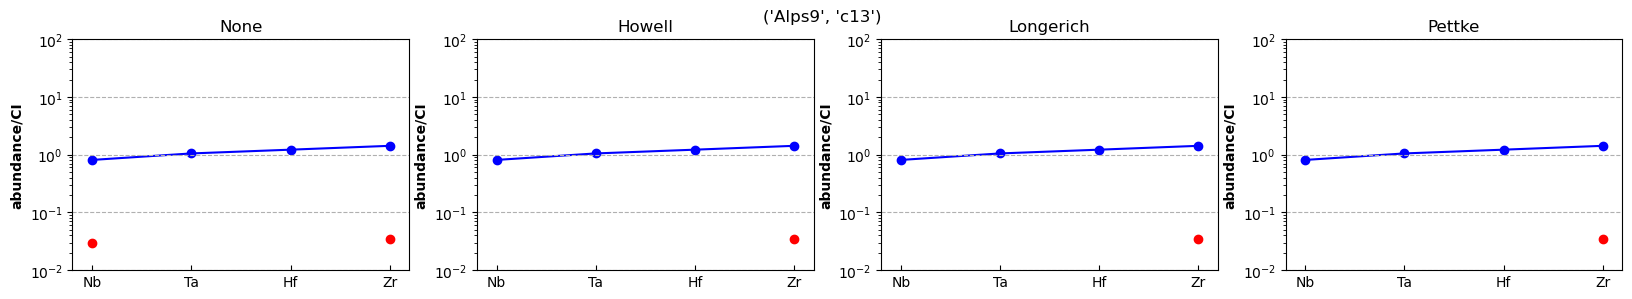

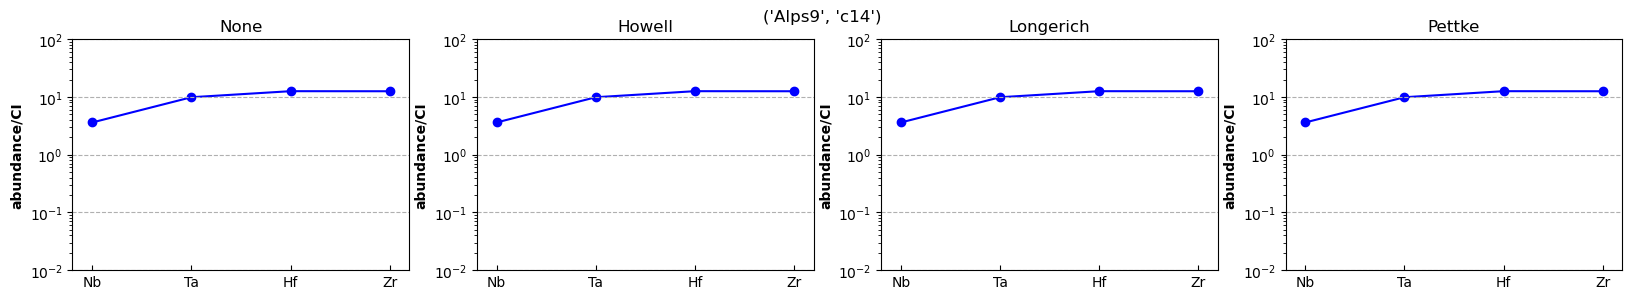

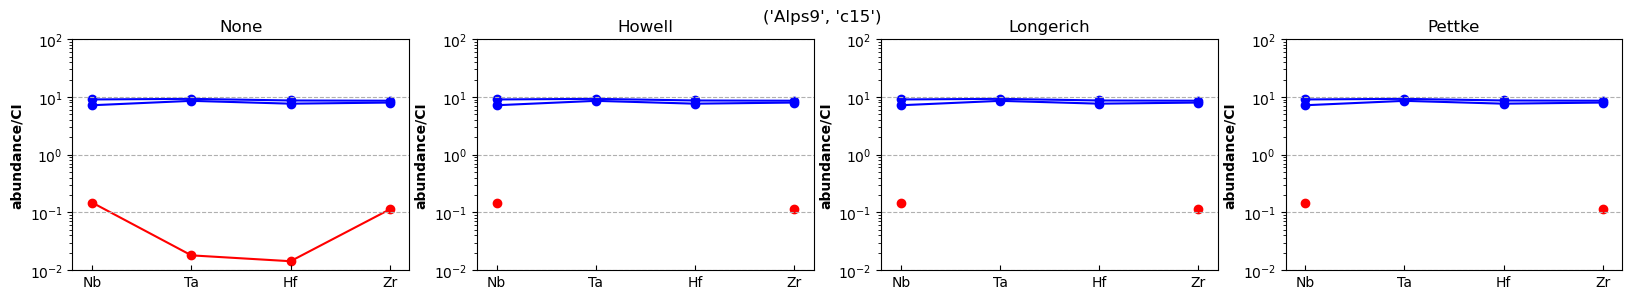

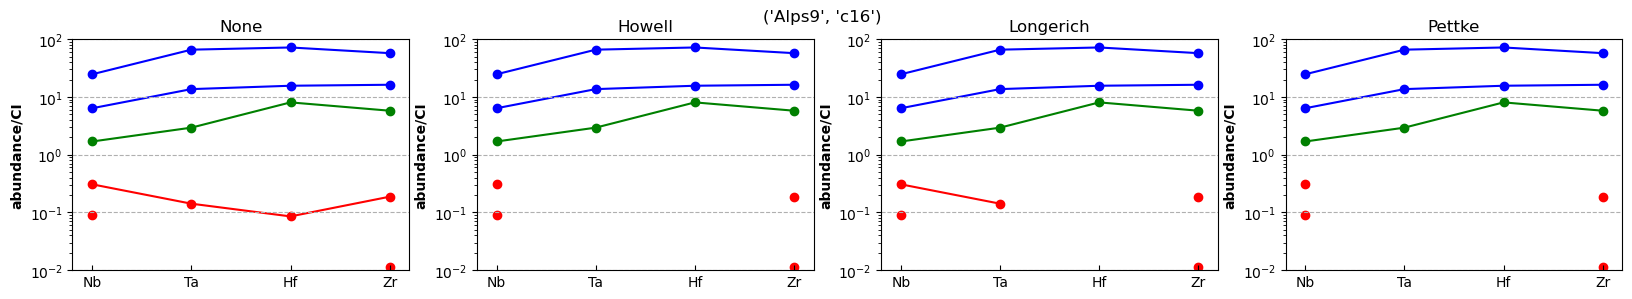

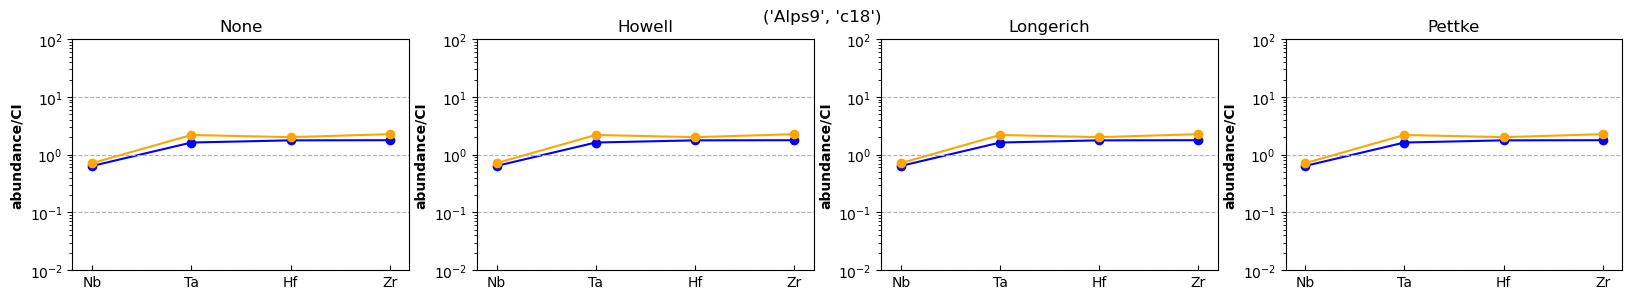

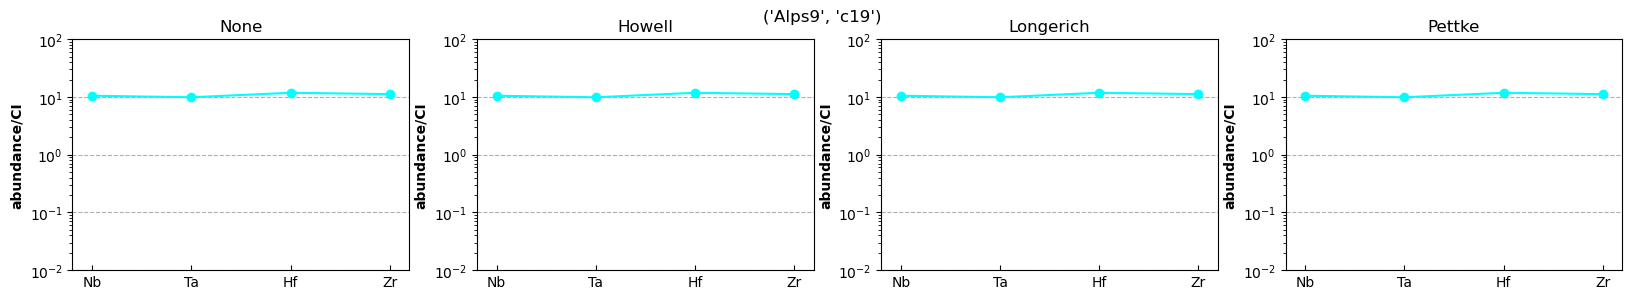

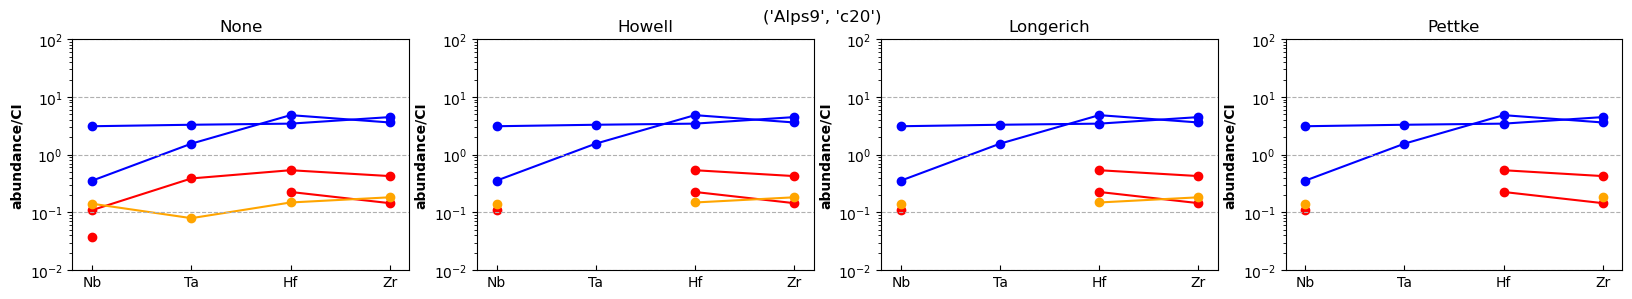

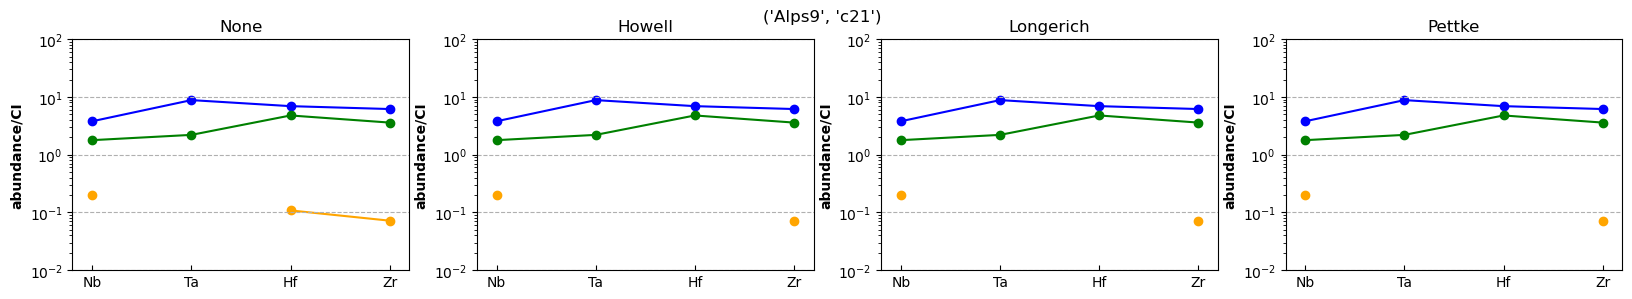

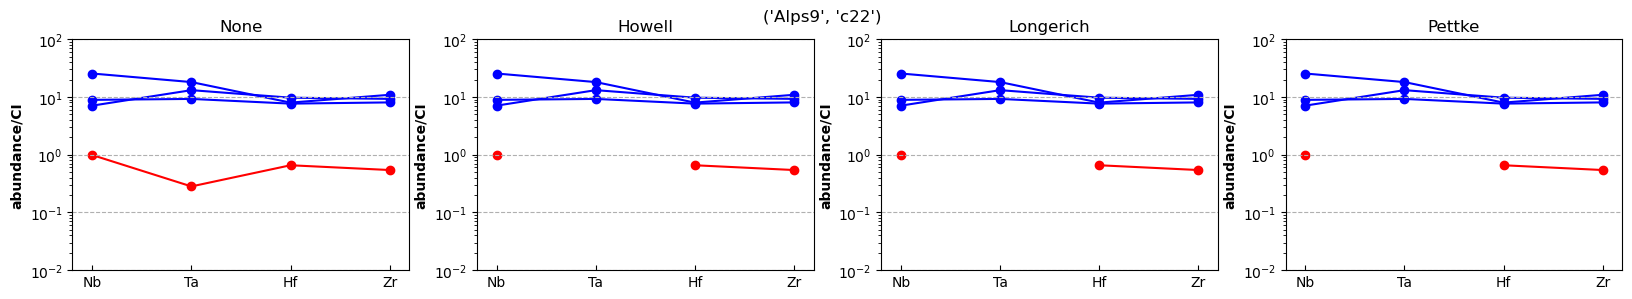

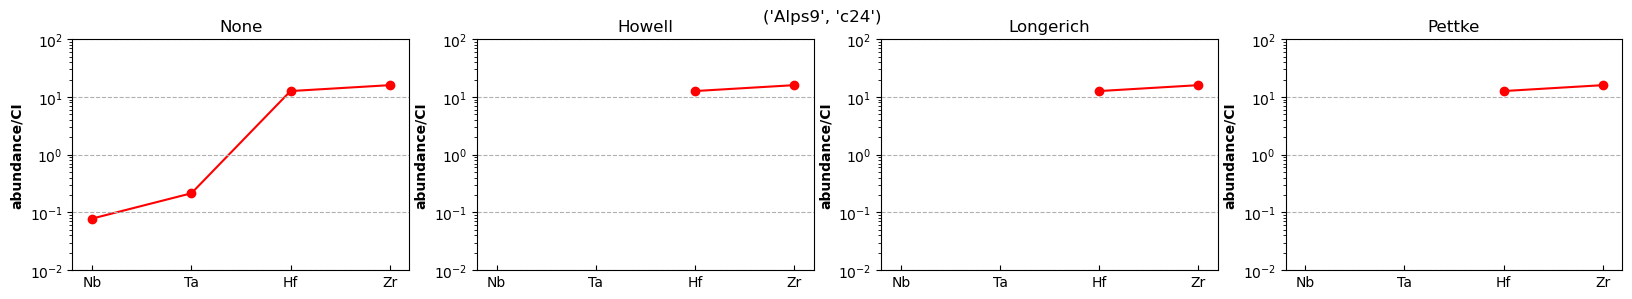

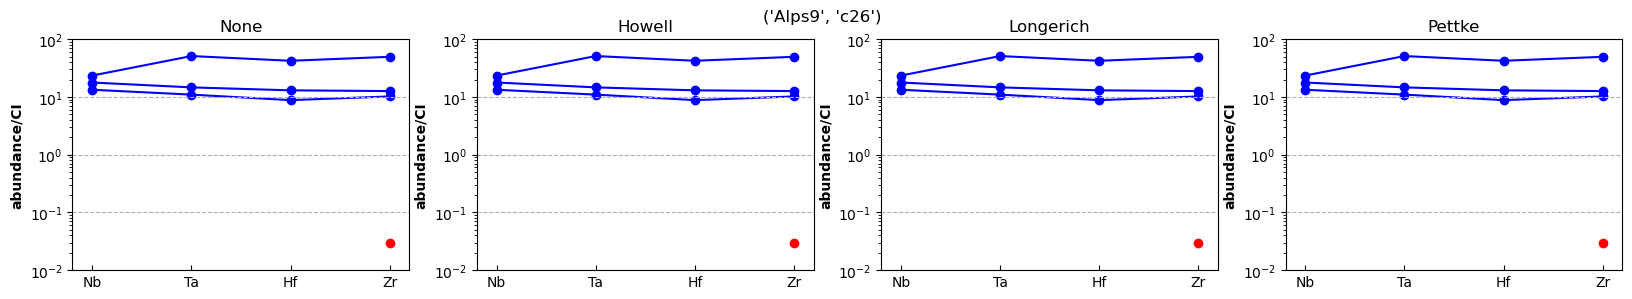

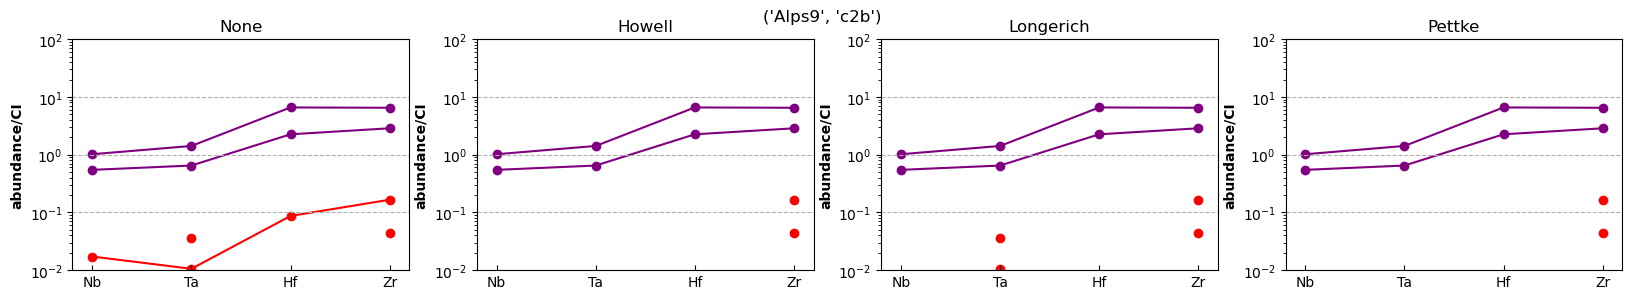

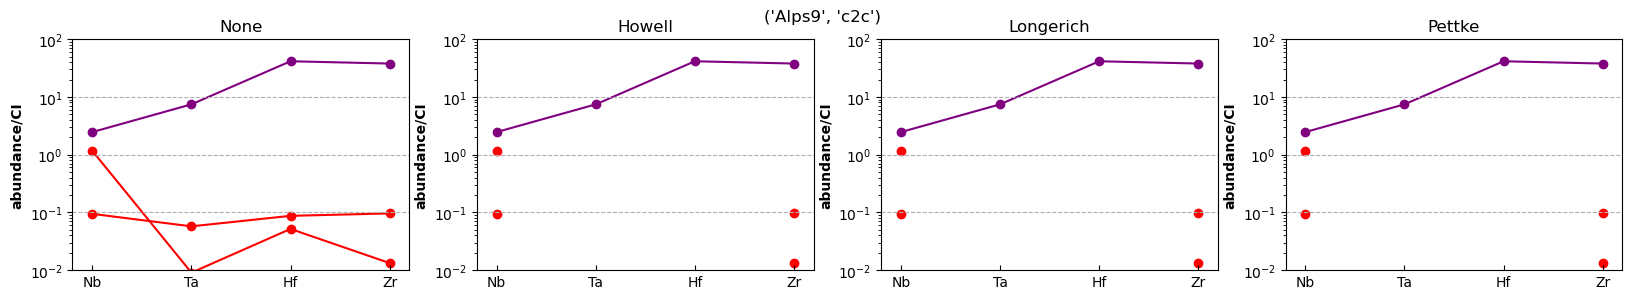

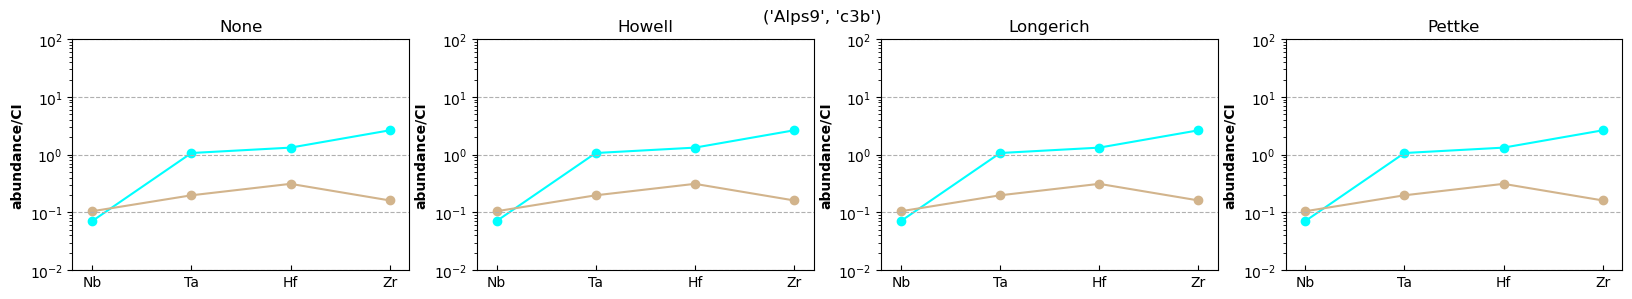

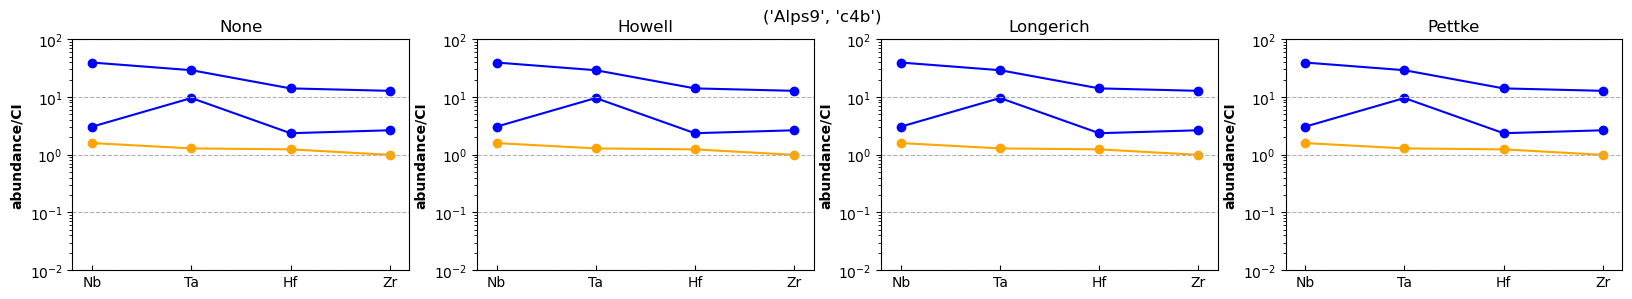

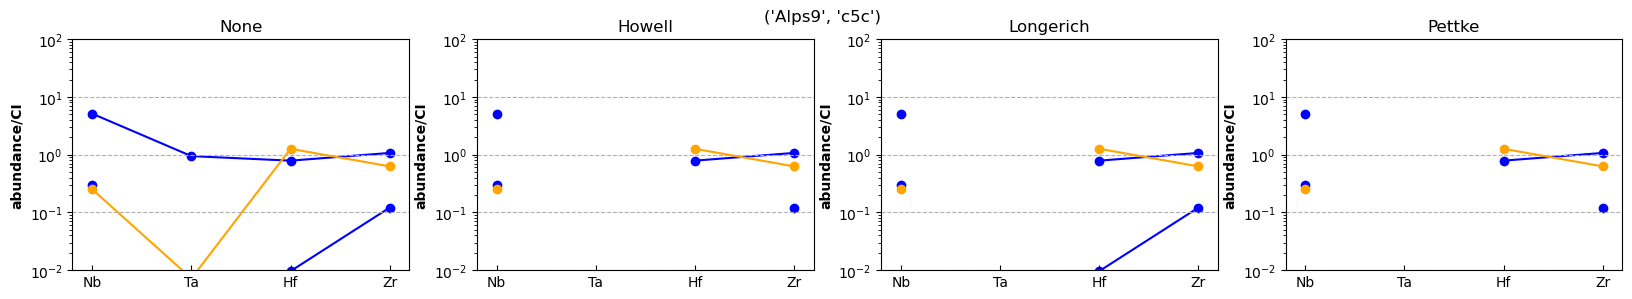

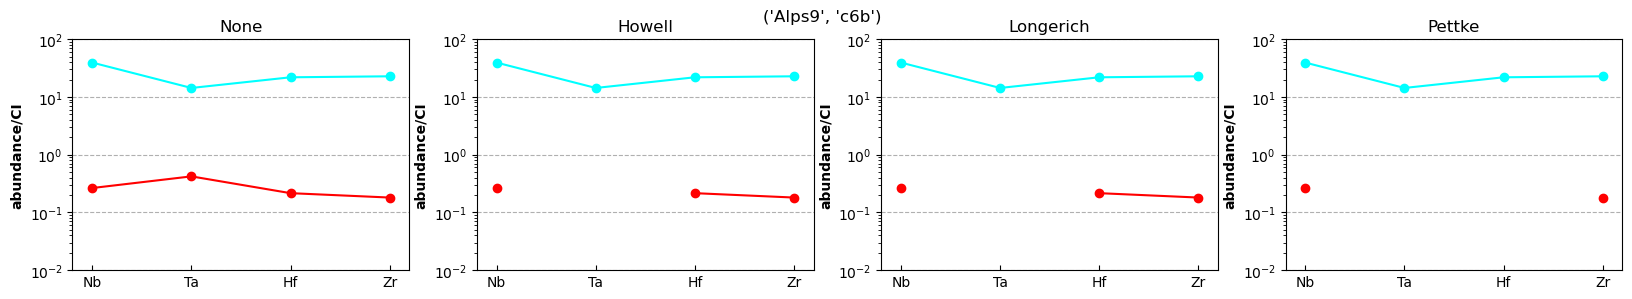

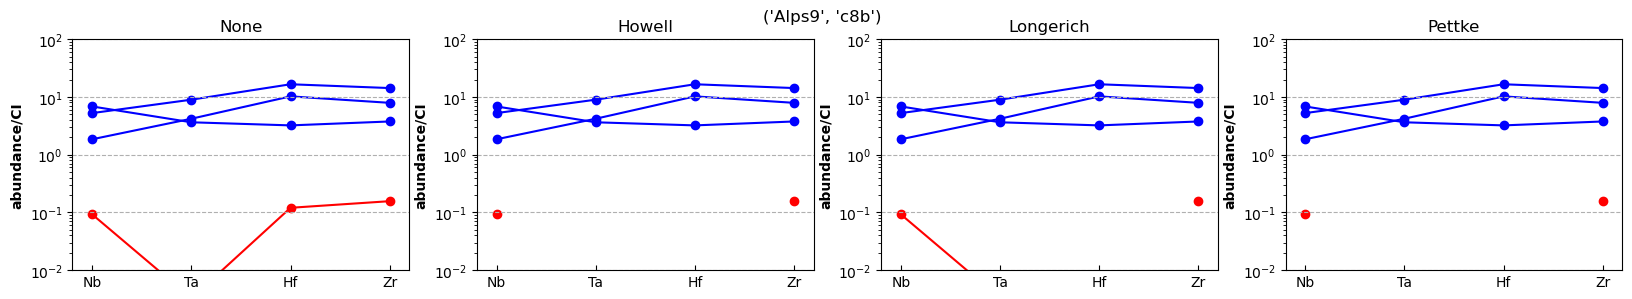

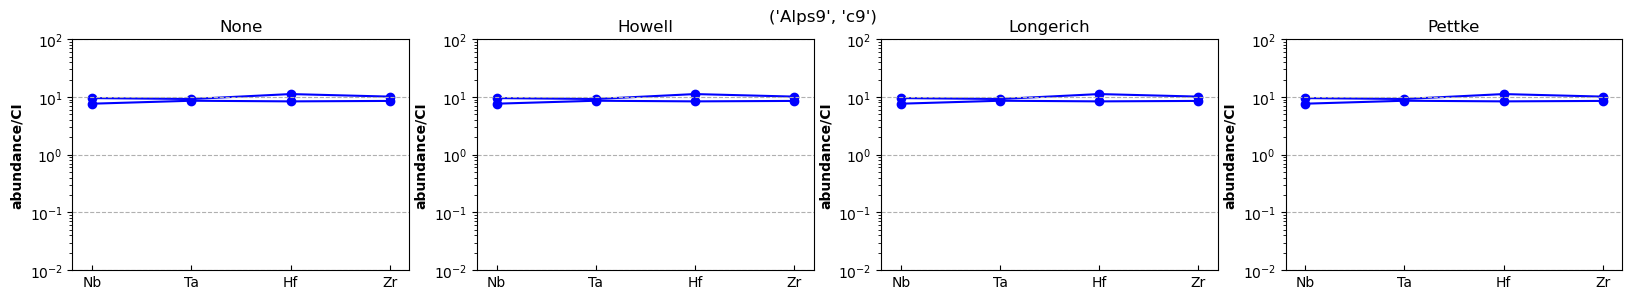

In [93]:
xarray = ['Nb', 'Ta', 'Hf', 'Zr']
for index in indexes:
    #setting up plot
    fig, axes = plt.subplots(1, 4, figsize=(20,3))
    fig.suptitle(index)

    for ax in axes:

        ax.set_ylabel('abundance/CI', fontweight='bold')
        ax.grid(axis='y', linestyle='--', zorder=0)
        ax.tick_params(axis='x', direction='in')
        ax.set_yscale("log") 
        ax.set_ylim([10**-2, 10**2])

        #arrays for plotting
        x_array = x_array = np.arange(4)
        ax.set_xticks(x_array)
        ax.set_xticklabels(['Nb', 'Ta', 'Hf', 'Zr'])

        # Add padding on the outer edges of x ticks
        x_padding = 0.2  
        ax.set_xlim(x_array[0] - x_padding, x_array[-1] + x_padding)
    
    #data
    hfseH = howl[(howl.meteorite==index[0]) & (howl.clast==index[1])][['Nb93_ppm_mean', 'Ta181_ppm_mean', 'Hf178_ppm_mean', 'Zr90_ppm_mean']]
    hfseL = long[(long.meteorite==index[0]) & (long.clast==index[1])][['Nb93_ppm_mean', 'Ta181_ppm_mean', 'Hf178_ppm_mean', 'Zr90_ppm_mean']]
    hfseP = pett[(pett.meteorite==index[0]) & (pett.clast==index[1])][['Nb93_ppm_mean', 'Ta181_ppm_mean', 'Hf178_ppm_mean', 'Zr90_ppm_mean']]
    hfseN = none[(none.meteorite==index[0]) & (none.clast==index[1])][['Nb93_ppm_mean', 'Ta181_ppm_mean', 'Hf178_ppm_mean', 'Zr90_ppm_mean']]
    
    phases = none[(none.meteorite==index[0]) & (none.clast==index[1])]['phase'].values
    
    #print(phases)
    
    for i in range(0, len(hfseN)):
        
        phase = phases[i]
        if phase=='gls':
            c='blue'
        if phase=='olv':
            c='red'
        if phase=='std':
            c='black'
        if phase=='cai':
            c='cyan'
        if phase=='opx':
            c='orange'
        if phase=='cpx':
            c='green'
        if phase=='matrix':
            c='tan'
        if phase=='aoa':
            c='purple'
        
        axes[1].set_title('Howell')
        axes[1].scatter(xarray, hfseH.iloc[i]/hfseCI, color=c, zorder=1)
        axes[1].plot(xarray, hfseH.iloc[i]/hfseCI, color=c, zorder=1)
        
        axes[2].set_title('Longerich')
        axes[2].scatter(xarray, hfseL.iloc[i]/hfseCI, color=c, zorder=1)
        axes[2].plot(xarray, hfseL.iloc[i]/hfseCI, color=c, zorder=1)
        
        axes[3].set_title('Pettke')
        axes[3].scatter(xarray, hfseP.iloc[i]/hfseCI, color=c, zorder=1)
        axes[3].plot(xarray, hfseP.iloc[i]/hfseCI, color=c, zorder=1)
        
        axes[0].set_title('None')
        axes[0].scatter(xarray, hfseN.iloc[i]/hfseCI, color=c, zorder=0)
        axes[0].plot(xarray, hfseN.iloc[i]/hfseCI, label=c, color=c, zorder=0)
        
        #ax.legend()
    